### This assignment shows the effect of Hurricane Michael on US Map


In [9]:
import pandas as pd
import geopandas as gpd  # used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [10]:
home_geo = geocode("2440 Ross Rd, Silver Spring, MD", provider = 'nominatim')
home_geo

,geometry,address
0,POINT (-77.04924 38.996646),"Ross Road, Rock Creek Gardens, Montgomery Hill..."


In [14]:
home_geo['address'].iloc[0]

'Ross Road, Rock Creek Gardens, Montgomery Hills, Silver Spring, Montgomery County, Maryland, 20815, United States'

In [12]:
home_geo2 = reverse_geocode([Point(-77.04924, 38.996646)], provider = 'nominatim')
home_geo2

,geometry,address
0,POINT (-77.04926459824991 38.996560164024),"2218, Ross Road, Rock Creek Gardens, Montgomer..."


In [19]:
## dataset for hurricane Micheal

location = "datasets_hurricaneMichael.csv"

## Load data into DataFarme
hurr_df = pd.read_csv(location, sep = ",")
hurr_df.head()



,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [23]:
hurr_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [24]:
hurr_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [63]:
#make a new column to hold the longitude & latitude as a list
hurr_df['coordinates'] = list(hurr_df[['Long', 'Lat']].values)
hurr_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [64]:
#list values in coordinates column is classified as object type
hurr_df['coordinates'].dtypes

dtype('O')

In [65]:
#convert the coordinates to a geolocation type
hurr_df['coordinates'] = hurr_df['coordinates'].apply(Point)

In [66]:
#coordinates column now has POINT next to each coordinate pair value
hurr_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [67]:
#coordinates column with geolocation data is just a regular pandas Series type
type(hurr_df['coordinates'])

pandas.core.series.Series

In [68]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_hurr = gpd.GeoDataFrame(hurr_df, geometry='coordinates')

In [69]:
geo_hurr.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [70]:
#verify coordinates column is geolocation data type
type(geo_hurr['coordinates'])

geopandas.geoseries.GeoSeries

In [71]:
#import file that contains a us map shape polygons
#will use to plot the coordinates of hurricane hit areas
filepath = "datasets_US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
usmap_df = gpd.read_file(filepath)
usmap_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.124658 30.28364, -88.08681..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.988606, -166.075..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.421439 37.869969, -122.42..."


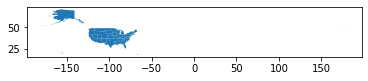

In [72]:
usmap_df.plot()

In [73]:
usmap48 = usmap_df.loc[usmap_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]


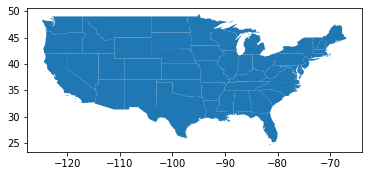

In [74]:
usmap48.plot()

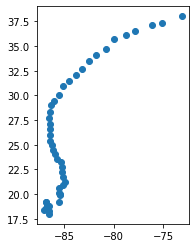

In [75]:
geo_hurr.plot()

Text(0.5, 1, 'Hurricane Micheal Effect in the US')

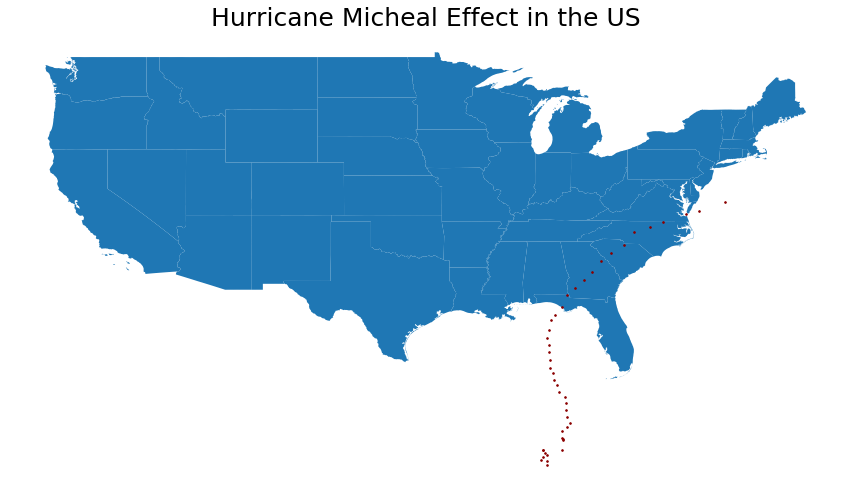

In [76]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = usmap48.plot(ax=ax)

#plot coordinates on top of map graph
geo_hurr.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Micheal Effect in the US", fontsize=25, fontweight=3)